In [1]:
from cshd import params_phenometrics, cube_query, get_phenometrics, smooth_timeseries

In [2]:
config = params_phenometrics(
    peak_metric='pos', 
    base_metric='vos', 
    method='seasonal_amplitude', 
    factor=0.2, 
    thresh_sides='two_sided', 
    abs_value=0.1
)

In [3]:
config

{'peak_metric': 'pos',
 'base_metric': 'vos',
 'method': 'seasonal_amplitude',
 'factor': 0.2,
 'thresh_sides': 'two_sided',
 'abs_value': 0.1}

In [5]:
S2_cube = cube_query(
    collection="S2-16D-2",
    start_date="2020-01-01",
    end_date="2020-12-31",
    freq='16D',
    band="NDVI"
)

In [6]:
S2_cube

{'collection': 'S2-16D-2',
 'band': 'NDVI',
 'start_date': '2020-01-01',
 'end_date': '2020-12-31',
 'freq': '16D'}

In [9]:
ds_phenos = get_phenometrics(
    cube=S2_cube,
    geom=[dict(coordinates = [-52.4538803100586, -13.68668633547038 ])],
    engine='phenolopy',
    smooth_method='None',
    config=config
)

{'values': array([3849., 2329., 4567., 3834., 6802., 8509., 8317., 7564., 4566.,
       3612., 3553., 2493., 2495., 2358., 2254., 2144., 2022., 2103.,
       2060., 2610., 4375., 6136., 6382.], dtype=float32), 'timeline': ['2020-01-01T00:00:00', '2020-01-17T00:00:00', '2020-02-02T00:00:00', '2020-02-18T00:00:00', '2020-03-05T00:00:00', '2020-03-21T00:00:00', '2020-04-06T00:00:00', '2020-04-22T00:00:00', '2020-05-08T00:00:00', '2020-05-24T00:00:00', '2020-06-09T00:00:00', '2020-06-25T00:00:00', '2020-07-11T00:00:00', '2020-07-27T00:00:00', '2020-08-12T00:00:00', '2020-08-28T00:00:00', '2020-09-13T00:00:00', '2020-09-29T00:00:00', '2020-10-15T00:00:00', '2020-10-31T00:00:00', '2020-11-16T00:00:00', '2020-12-02T00:00:00', '2020-12-18T00:00:00']}
<xarray.DataArray (time: 23)> Size: 92B
array([3849., 2329., 4567., 3834., 6802., 8509., 8317., 7564., 4566.,
       3612., 3553., 2493., 2495., 2358., 2254., 2144., 2022., 2103.,
       2060., 2610., 4375., 6136., 6382.], dtype=float32)
Coordinat

In [10]:
ds_phenos 

{'phenometrics': {'mos_v': 8319.5,
  'roi_v': 146.09375,
  'rod_v': 61.95000076293945,
  'lios_v': 46757.0,
  'sios_v': 30581.0,
  'liot_va': 89818.5,
  'siot_v': 45334.5,
  'aos_v': 6487.0,
  'bse_v': 2175.5,
  'los_v': 112.0,
  'sos_v': 3834.0,
  'sos_t': '2020-02-19T00:00:00',
  'pos_v': 8509.0,
  'pos_t': '2020-03-22T00:00:00',
  'vos_v': 2022.0,
  'vos_t': '2020-09-14T00:00:00',
  'eos_v': 3553.0,
  'eos_t': '2020-06-10T00:00:00'},
 'timeseries': {'values': array([3849., 2329., 4567., 3834., 6802., 8509., 8317., 7564., 4566.,
         3612., 3553., 2493., 2495., 2358., 2254., 2144., 2022., 2103.,
         2060., 2610., 4375., 6136., 6382.], dtype=float32),
  'timeline': ['2020-01-01T00:00:00',
   '2020-01-17T00:00:00',
   '2020-02-02T00:00:00',
   '2020-02-18T00:00:00',
   '2020-03-05T00:00:00',
   '2020-03-21T00:00:00',
   '2020-04-06T00:00:00',
   '2020-04-22T00:00:00',
   '2020-05-08T00:00:00',
   '2020-05-24T00:00:00',
   '2020-06-09T00:00:00',
   '2020-06-25T00:00:00',
   '20

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [12]:
dates_datetime64 = pd.date_range(pd.to_datetime(S2_cube['start_date'], format='%Y-%m-%d'), periods=len(ds_phenos['timeseries']["timeline"]), freq="16D")

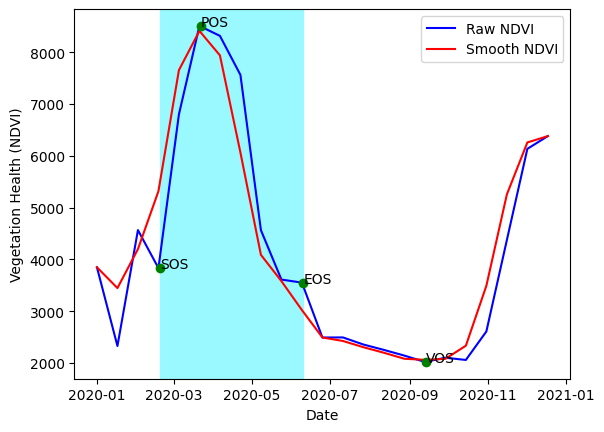

In [20]:

y_new = smooth_timeseries(ts=ds_phenos['timeseries']['values'], method='savitsky', window_length=2)

plt.plot(dates_datetime64, ds_phenos['timeseries']['values'], color='blue', label='Raw NDVI') 
plt.plot(dates_datetime64, y_new, color='red', label='Smooth NDVI') 

p = ds_phenos["phenometrics"]

sos_time = datetime.strptime(p['sos_t'], '%Y-%m-%dT00:00:00')
plt.plot(sos_time, p['sos_v'], 'go', label='_nolegend_')
plt.annotate('SOS', [sos_time, p['sos_v']])

eos_time = datetime.strptime(p['eos_t'], '%Y-%m-%dT00:00:00')
plt.plot(eos_time, p['eos_v'], 'go', label='_nolegend_')
plt.annotate('EOS', [eos_time, p['eos_v']])

pos_time = datetime.strptime(p['pos_t'], '%Y-%m-%dT00:00:00')
plt.plot(pos_time, p['pos_v'], 'go', label='_nolegend_')
plt.annotate('POS', [pos_time, p['pos_v']])

vos_time = datetime.strptime(p['vos_t'], '%Y-%m-%dT00:00:00')
plt.plot(vos_time, p['vos_v'], 'go', label='_nolegend_')
plt.annotate('VOS', [vos_time, p['vos_v']])

plt.axvspan(sos_time, eos_time, color='#9af8ff')

plt.ylabel('Vegetation Health (NDVI)')
plt.xlabel('Date')
plt.legend(loc="upper right")